###### Import Dependencies

In [52]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
print(tf.__version__)

1.14.0


###### Prints out all the contents of a cell

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Define functions
##### 1.Add gausian noise 
##### 2.Drop highly correlated features


In [53]:

def add_gausian(y,mu,sigma):
    noise = np.random.normal(mu,sigma,[4175, 117])
    df_aug = df_train_set +noise 
    #df_new = pd.concat([df_train_set,df_aug])
    return(df_aug)

def drop_corr(df):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column]>0.95)]
    df_new = df.drop(df[to_drop],axis = 1)
    return(df_new)

###### Get the Data 

In [54]:
df = pd.read_csv('~/Desktop/data/kinase_files/KinaseP00533.csv')
df.head()

,Unnamed: 0,target_id,pAc,smiles,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,2609,P00533,1.60,C1=CC(=CC=C1CCC(=O)C2=C(C=C(C=C2O)O)O)O,2.3245,72.1947,114.921781,97.99,274.272,274.084124,...,0,0,0,2,0,0,0,0,0,0
1,2610,P00533,1.72,C1=CC(=C(C=C1/C=C/C(=O)C2=C(C(=C(C=C2)O[C@H]3[...,-0.4162,107.3029,180.820025,197.37,450.396,450.116212,...,0,0,0,3,0,0,0,0,0,0
2,2611,P00533,1.96,C[C@@H](C(=O)N1CCN(CC1)C2=CC(=C(C=C2NC(=O)C=C)...,3.3508,156.8052,240.763560,137.22,577.045,576.200029,...,0,0,1,4,0,0,0,0,2,1
3,2612,P00533,1.99,COC1=C(C=C(C(=C1)N2CCN(CC2)C(=O)N3CCNCC3)NC(=O...,3.4686,169.9561,259.003075,132.26,617.114,616.242563,...,0,0,1,5,0,0,0,0,2,1
4,2613,P00533,2.00,CN(C)CC(=O)N1CCN(CC1)C2=CC(=C(C=C2NC(=O)C=C)NC...,3.5316,163.6784,248.094102,120.23,590.088,589.231664,...,0,0,1,4,0,0,0,0,2,1


###### Drop highly correlated features

In [55]:
drop_corr(df).head()

,Unnamed: 0,target_id,smiles,SlogP,SMR,TPSA,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,...,MQN32,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41
0,2609,P00533,C1=CC(=CC=C1CCC(=O)C2=C(C=C(C=C2O)O)O)O,2.3245,72.1947,97.99,5,4,4,4,...,0,0,0,0,2,0,0,0,0,0
1,2610,P00533,C1=CC(=C(C=C1/C=C/C(=O)C2=C(C(=C(C=C2)O[C@H]3[...,-0.4162,107.3029,197.37,11,8,6,8,...,0,0,0,0,3,0,0,0,0,0
2,2611,P00533,C[C@@H](C(=O)N1CCN(CC1)C2=CC(=C(C=C2NC(=O)C=C)...,3.3508,156.8052,137.22,12,3,8,3,...,0,0,0,1,4,0,0,0,0,2
3,2612,P00533,COC1=C(C=C(C(=C1)N2CCN(CC2)C(=O)N3CCNCC3)NC(=O...,3.4686,169.9561,132.26,13,3,7,3,...,0,0,0,1,5,0,0,0,0,2
4,2613,P00533,CN(C)CC(=O)N1CCN(CC1)C2=CC(=C(C=C2NC(=O)C=C)NC...,3.5316,163.6784,120.23,12,2,9,2,...,0,0,0,1,4,0,0,0,0,2


###### Drop unwanted colum(unnamed)

In [56]:
df = df.drop(['Unnamed: 0','smiles','target_id'], axis=1)
df.head()

,pAc,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,1.60,2.3245,72.1947,114.921781,97.99,274.272,274.084124,5,4,4,...,0,0,0,2,0,0,0,0,0,0
1,1.72,-0.4162,107.3029,180.820025,197.37,450.396,450.116212,11,8,6,...,0,0,0,3,0,0,0,0,0,0
2,1.96,3.3508,156.8052,240.763560,137.22,577.045,576.200029,12,3,8,...,0,0,1,4,0,0,0,0,2,1
3,1.99,3.4686,169.9561,259.003075,132.26,617.114,616.242563,13,3,7,...,0,0,1,5,0,0,0,0,2,1
4,2.00,3.5316,163.6784,248.094102,120.23,590.088,589.231664,12,2,9,...,0,0,1,4,0,0,0,0,2,1


###### split train and test set 

In [57]:
train_df = df.sample(frac=0.8,random_state = 0)
test_df = df.drop(train_df.index)

###### Check the shape of the training and the test set

In [59]:
train_df.shape
test_df.shape

(3711, 117)

(928, 117)

###### summary statistics of the dataframe 

In [61]:
train_stats = train_df.describe()
train_stats.pop("pAc")
train_stats = train_stats.transpose()
train_stats.head()

count    3711.000000
mean        6.438436
std         1.425069
min         1.720000
25%         5.300000
50%         6.340000
75%         7.550000
max        11.520000
Name: pAc, dtype: float64

,count,mean,std,min,25%,50%,75%,max
SlogP,3711.0,4.336596,1.440922,-5.994500,3.467200,4.312700,5.19770,10.443700
SMR,3711.0,117.072715,29.004333,0.000000,96.938350,116.027400,134.99625,369.304200
LabuteASA,3711.0,178.023595,44.477441,44.557992,146.728065,175.778415,206.54352,585.643709
TPSA,3711.0,86.339003,30.535997,0.000000,67.170000,85.660000,104.18500,530.870000
AMW,3711.0,433.289800,110.195260,126.111000,357.036000,429.883000,502.53800,1422.720000


###### test and train dataframes

In [62]:
test_df.head()
train_df.head()

,pAc,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,1.60,2.32450,72.1947,114.921781,97.99,274.272,274.084124,5,4,4,...,0,0,0,2,0,0,0,0,0,0
3,1.99,3.46860,169.9561,259.003075,132.26,617.114,616.242563,13,3,7,...,0,0,1,5,0,0,0,0,2,1
7,2.19,1.59806,46.5268,76.470565,67.81,172.187,172.063663,3,1,2,...,0,0,0,1,0,0,0,0,0,0
21,2.89,0.75056,44.6050,75.164620,74.52,171.159,171.043262,4,0,1,...,0,0,0,1,0,0,0,0,0,0
24,2.96,1.78248,60.5016,98.187567,90.55,233.223,233.068808,5,2,3,...,0,0,0,1,0,0,0,0,0,0


,pAc,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
2782,6.920,4.04760,117.5032,177.645097,86.34,412.453,412.164774,8,1,6,...,0,0,2,3,0,0,0,0,4,2
1957,6.050,3.85630,117.0347,182.011913,101.30,435.871,435.109817,8,3,6,...,0,0,2,3,0,0,0,0,4,2
3160,7.240,4.91810,98.5481,146.287417,80.95,358.810,358.029124,6,1,3,...,0,0,1,3,0,0,0,0,4,2
2923,7.040,2.66820,110.5373,166.973687,95.42,416.528,416.097683,7,2,6,...,0,0,1,3,0,0,0,0,4,2
1625,5.745,3.59912,124.1661,193.367303,133.77,460.450,460.149518,11,1,8,...,0,0,1,3,0,0,0,0,2,1


###### Split features from labels 

In [63]:
train_labels = train_df.pop('pAc')
test_labels = test_df.pop('pAc')

###### Normalize the data 

In [66]:
def norm(x):
    return(x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(train_df)
normed_test_data = norm(test_df)

###### Model

In [95]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_df.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model
model = build_model()


###### Inspect the model and sprint a summary of the model

In [96]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                7488      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 11,713
Trainable params: 11,713
Non-trainable params: 0
_________________________________________________________________


###### Lets tryout the model  
Use ten training data points

In [97]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.22003573],
       [-0.8183713 ],
       [-0.48176515],
       [-0.8448615 ],
       [-0.44782478],
       [ 0.76678306],
       [ 0.04641029],
       [ 0.23015733],
       [ 0.16588745],
       [-0.27524978]], dtype=float32)

###### Train the model
#Train the model for 300 epochs, and record the training and validation accuracy in the history object.
#### Display training progress by printing a single dot for each completed epoch

In [98]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 300

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

###### Visualize the model's training progress using the stats stored in the history object.

In [89]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
295,0.108206,0.241290,0.108206,1.085134,0.780313,1.085134,295
296,0.107873,0.239740,0.107873,1.066098,0.776523,1.066098,296
297,0.105626,0.237266,0.105626,1.106366,0.793979,1.106366,297
298,0.106740,0.241005,0.106740,1.106178,0.797737,1.106178,298
299,0.107119,0.239125,0.107119,1.062685,0.769061,1.062685,299


<Figure size 800x800 with 0 Axes>

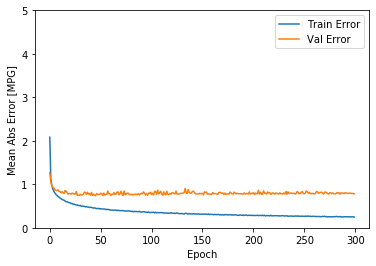

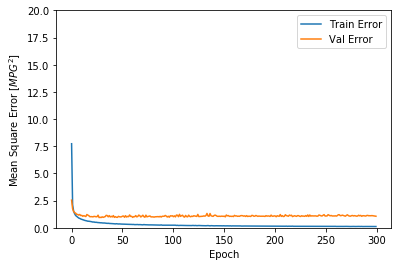

In [101]:
import matplotlib.pyplot as plt


def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(10, 10), dpi=80)
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)